In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
def euclidean_distance(df):
    n = df.shape[0]
    dist = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            dist[i,j] = np.sqrt(np.sum((df.iloc[i] - df.iloc[j])**2))
    return dist

In [7]:
def prims_mst(matrix):
    nodes = len(matrix)
    mst = [None] * nodes
    k = [float('inf')] * nodes
    visited = [False] * nodes

    mst[0] = -1
    k[0] = 0

    for _ in range(nodes):
        min_k = float('inf')
        u = -1

        for i in range(nodes):
            if not visited[i] and k[i] < min_k:
                min_k = k[i]
                u = i

        visited[u] = True

        for v in range(nodes):
            if matrix[u][v] and not visited[v] and matrix[u][v] < k[v]:
                mst[v] = u
                k[v] = matrix[u][v]

    mst_adj_matrix = np.zeros_like(matrix)
    for i in range(1, nodes):
        parent = mst[i]
        weight = matrix[i][parent]
        mst_adj_matrix[parent][i] = weight

    return mst_adj_matrix

In [9]:
def plot_graph(df,graph,clusters=None):
    if clusters is None:
        plt.scatter(df.iloc[:,0],df.iloc[:,1],c='blue')
    else:
        for i in range(len(clusters)):
            plt.scatter(df.iloc[list(clusters[i]),0],df.iloc[list(clusters[i]),1])
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if graph[i,j] != 0:
                plt.plot([df.iloc[i,0],df.iloc[j,0]],[df.iloc[i,1],df.iloc[j,1]],c='black')

    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])

In [2]:
dataset = pd.read_csv("iris.csv").drop("Id", axis=1)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
columns = ['SepalLengthCm', 'SepalWidthCm']
dataset = dataset[columns]
dataset

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [5]:
dist_matrix = euclidean_distance(dataset)
dist_matrix

array([[0.        , 0.53851648, 0.5       , ..., 1.48660687, 1.1045361 ,
        0.94339811],
       [0.53851648, 0.        , 0.28284271, ..., 1.6       , 1.36014705,
        1.        ],
       [0.5       , 0.28284271, 0.        , ..., 1.81107703, 1.5132746 ,
        1.21655251],
       ...,
       [1.48660687, 1.6       , 1.81107703, ..., 0.        , 0.5       ,
        0.6       ],
       [1.1045361 , 1.36014705, 1.5132746 , ..., 0.5       , 0.        ,
        0.5       ],
       [0.94339811, 1.        , 1.21655251, ..., 0.6       , 0.5       ,
        0.        ]])

In [8]:
mst = prims_mst(dist_matrix)
# count number of edges
print("Number of edges in MST: ", np.count_nonzero(mst))

Number of edges in MST:  149


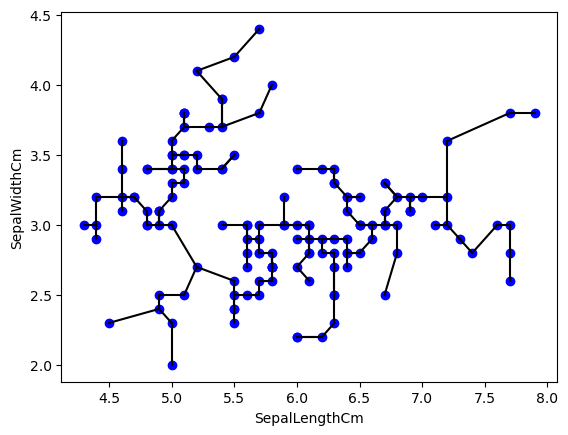

In [10]:
plot_graph(dataset,mst)
plt.show()